In [24]:
import pandas as pd
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

# Lectura de los datos
df=pd.read_csv("data.txt")

# Reemplazar las variables categoricas por variables dummies
df = pd.get_dummies(df, columns=['team'], dtype = int)
df = pd.get_dummies(df, columns=['quarter'], dtype = int)
df = pd.get_dummies(df, columns=['day'], dtype = int)

# Corregir los errores dentro de los datos
df['department'] = df['department'].replace('finishing ', 'finishing')


df.head()

,date,department,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,...,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,1/1/2015,sweing,0.80,26.16,1108.0,7080,98,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1/1/2015,finishing,0.75,3.94,NaN,960,0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1/1/2015,sweing,0.80,11.41,968.0,3660,50,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1/1/2015,sweing,0.80,11.41,968.0,3660,50,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1/1/2015,sweing,0.80,25.90,1170.0,1920,50,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
# Creacion del dataframe sin la variable wip
df_sinWIP=df.drop('wip', axis=1)

# Convierte la variable department en dummie
df_sinWIP = pd.get_dummies(df_sinWIP, columns=['department'], dtype = int)

df_sinWIP.columns

Index(['date', 'targeted_productivity', 'smv', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity', 'team_1', 'team_2', 'team_3', 'team_4', 'team_5',
       'team_6', 'team_7', 'team_8', 'team_9', 'team_10', 'team_11', 'team_12',
       'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3',
       'quarter_Quarter4', 'quarter_Quarter5', 'day_Monday', 'day_Saturday',
       'day_Sunday', 'day_Thursday', 'day_Tuesday', 'day_Wednesday',
       'department_finishing', 'department_sweing'],
      dtype='object')

In [26]:
df_sinWIP.shape

(1197, 35)

# Modelo de Regresion Sin WIP

Entrenamiento del modelo

In [27]:
# Variables pertenecientes al modelo completo declarando como base al equipo 11, quarter 5, dia miercoles y departamento de sweing
features = ['targeted_productivity', 'smv', 'over_time', 'incentive',
            'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
            'team_1', 'team_2', 'team_3', 'team_4', 'team_5',
            'team_6', 'team_7', 'team_8', 'team_9', 'team_10', 'team_11', 
            'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3',
            'quarter_Quarter4', 'day_Monday', 'day_Saturday',
            'day_Sunday', 'day_Thursday', 'day_Tuesday', 
            'department_finishing']

X = df_sinWIP[features]
Y = df_sinWIP['actual_productivity']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

X_train = sm.add_constant(X_train)

model = sm.OLS(Y_train, X_train).fit()

print(model.summary())


                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.355
Model:                             OLS   Adj. R-squared:                  0.334
Method:                  Least Squares   F-statistic:                     16.48
Date:                 Tue, 12 Mar 2024   Prob (F-statistic):           4.39e-64
Time:                         16:17:44   Log-Likelihood:                 501.67
No. Observations:                  897   AIC:                            -943.3
Df Residuals:                      867   BIC:                            -799.4
Df Model:                           29                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

In [28]:
# Variables significativas y no significativas dentro del modelo
summary_table = model.summary().tables[1]
p_values = [row[4] for row in summary_table.data[1:]]
variables = [row[0] for row in summary_table.data[1:]]

p_values = [float(pvalue.strip()) for pvalue in p_values]

for i in range(len(variables)):
    pvalue = (p_values[i])
    variable = variables[i]
    if pvalue < 0.1:
        texto = 'Significativo'
    else:
        texto = 'NO Significativo'
    print(variable + ': ' + texto)

const: Significativo
targeted_productivity: Significativo
smv: Significativo
over_time: NO Significativo
incentive: Significativo
idle_time: NO Significativo
idle_men: Significativo
no_of_style_change: Significativo
no_of_workers: Significativo
team_1: Significativo
team_2: NO Significativo
team_3: NO Significativo
team_4: NO Significativo
team_5: NO Significativo
team_6: Significativo
team_7: NO Significativo
team_8: Significativo
team_9: NO Significativo
team_10: NO Significativo
team_11: Significativo
quarter_Quarter1: Significativo
quarter_Quarter2: Significativo
quarter_Quarter3: Significativo
quarter_Quarter4: Significativo
day_Monday: NO Significativo
day_Saturday: NO Significativo
day_Sunday: NO Significativo
day_Thursday: NO Significativo
day_Tuesday: NO Significativo
department_finishing: NO Significativo


Prueba y evaluacion del modelo

In [29]:
# Error cuadratico medio
Y_pred = model.predict(sm.add_constant(X_test))
mse_model = mean_squared_error(Y_test, Y_pred)

print("Error cuadrático medio del modelo:", mse_model)


Error cuadrático medio del modelo: 0.025878253902111344


In [30]:
# Validacion cruzada
model_sklearn = LinearRegression()
scores = cross_val_score(model_sklearn, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores

print("MSE para cada fold:", mse_scores)
print("MSE promedio:", np.mean(mse_scores))
print("Desviación estándar del MSE:", np.std(mse_scores))



MSE para cada fold: [0.02214309 0.01966917 0.01902897 0.01868133 0.02370308]
MSE promedio: 0.020645129222598996
Desviación estándar del MSE: 0.0019501764307353548


Entrenamiento modelo reducido

In [31]:
# Variables pertenecientes al modelo completo declarando como base al equipo 11, y quarter 5
new_features = ['targeted_productivity', 'smv', 'incentive', 'idle_men',
                'team_11', 'team_8', 'team_6', 'team_1','no_of_style_change', 
                'no_of_workers', 'quarter_Quarter1', 'quarter_Quarter2',
                 'quarter_Quarter3', 'quarter_Quarter4'
                ]


X_new = df_sinWIP[new_features]
Y_new = df_sinWIP['actual_productivity']

X_train_new, X_test_new, Y_train_new, Y_test_new = train_test_split(X_new, Y_new, random_state=1)

X_train_new = sm.add_constant(X_train_new)

model_new = sm.OLS(Y_train_new, X_train_new).fit()

Prueba y evaluacion del modelo reducido

In [32]:
#Error cuadratico medio
Y_pred_new = model_new.predict(sm.add_constant(X_test_new))
mse_model_new = mean_squared_error(Y_test_new, Y_pred_new)

print("Error cuadrático medio del modelo reducido:", mse_model_new)

Error cuadrático medio del modelo reducido: 0.026983796226703667


In [33]:
# Validacion cruzada
model_sklearn = LinearRegression()
scores = cross_val_score(model_sklearn, X_train_new, Y_train_new, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores

print("MSE para cada fold:", mse_scores)
print("MSE promedio:", np.mean(mse_scores))
print("Desviación estándar del MSE:", np.std(mse_scores))

MSE para cada fold: [0.02298235 0.01960038 0.01821004 0.01905568 0.02359046]
MSE promedio: 0.02068778005089382
Desviación estándar del MSE: 0.002176050039392437


¿El modelo reducido es mejor que el modelo completo? ¿El quitar las variables no significativas mejora el modelo?

In [34]:
# prueba F-Parcial para modelos anidados, Ho: Es mejor el modelo reducido, H1:¬Ho
f_statistic, p_value, _ = model.compare_f_test(model_new)

print(f'Estadístico F parcial: {f_statistic}')
print(f'Valor p: {p_value}')


if p_value < 0.05:
    print('El modelo completo es estadisticamente mejor que el modelo reducido')
else:
    print('El modelo reducido es estadisticamente mejor que el modelo completo')

Estadístico F parcial: 2.340323628917758
Valor p: 0.002739775957898412
El modelo completo es estadisticamente mejor que el modelo reducido


Intervalo de confianza dados valores para cada x en base a un usuario final

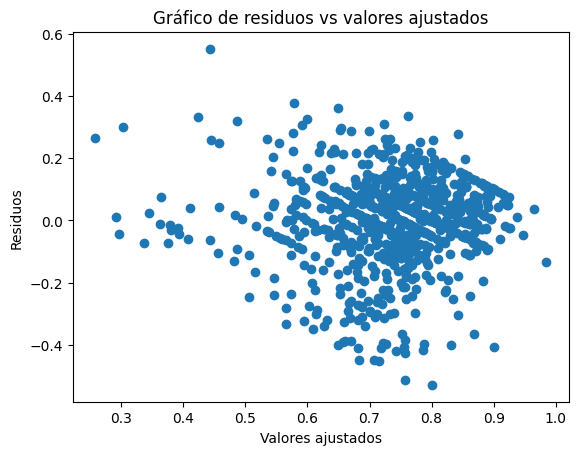

In [36]:
import matplotlib.pyplot as plt

residuals = model.resid

# Graficar los residuos contra los valores ajustados
plt.scatter(model.fittedvalues, residuals)
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')
plt.title('Gráfico de residuos vs valores ajustados')
plt.show()

In [35]:
# Definir los valores de x proporcionados por el usuario final
valores_x_usuario = [valor_x1, valor_x2, ..., valor_xN]

# Agregar constante dado que el modelo cuenta con un intercepto
valores_x_usuario_con_constante = sm.add_constant(valores_x_usuario)

# Intervalo de confianza
prediccion_usuario = model.get_prediction(valores_x_usuario_con_constante)
intervalo_confianza_usuario = prediccion_usuario.conf_int()


print("Intervalo de confianza del valor esperado de y para los valores de x dados:")
print(intervalo_confianza_usuario)


NameError: name 'valor_x1' is not defined